# 9章　多値分類

In [1]:
# 必要ライブラリの宣言
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# PDF出力用
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

### データ読み込み

In [3]:
# 学習用データ準備
from sklearn.datasets import load_iris
iris = load_iris()
x_org, y_org = iris.data, iris.target

# 入力データに関しては、sepal length(0)とpetal length(2)のみ抽出
x_select = x_org[:,[0,2]]
print('元データ', x_select.shape, y_org.shape)

元データ (150, 2) (150,)


In [4]:
x_org

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### 学習データの散布図表示

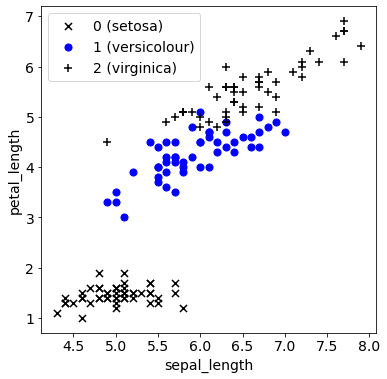

In [5]:
# 散布図の表示
x_t0 = x_select[y_org == 0]
x_t1 = x_select[y_org == 1]
x_t2 = x_select[y_org == 2]
plt.figure(figsize=(6,6))
plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='k', s=50, label='0 (setosa)')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', c='b', s=50, label='1 (versicolour)')
plt.scatter(x_t2[:,0], x_t2[:,1], marker='+', c='k', s=50, label='2 (virginica)')
plt.xlabel('sepal_length', fontsize=14)
plt.ylabel('petal_length', fontsize=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(fontsize=14)
plt.show()

In [6]:
x_t0

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4]])

### データ前処理

In [7]:
# ダミー変数を追加
# 1列目に1.0を追加
x_all = np.insert(x_select, 0, 1.0, axis=1)

In [8]:
# yをOne-hot-Vectorに
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False,categories='auto')
y_work = np.c_[y_org]
y_all_one = ohe.fit_transform(y_work)
print('オリジナル', y_org.shape)
print('２次元化', y_work.shape)
print('One Hot Vector化後', y_all_one.shape)

オリジナル (150,)
２次元化 (150, 1)
One Hot Vector化後 (150, 3)


In [9]:
##### 確認
test = [1, 1, 4]
test_work = np.c_[test]
test_work
test_all_one = ohe.fit_transform(test_work)
test_all_one

array([[1., 0.],
       [1., 0.],
       [0., 1.]])

In [10]:
y_org

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# 学習データ、検証データに分割
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test, y_train_one, y_test_one = train_test_split(
    x_all, y_org, y_all_one, train_size=75, test_size=75, random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, 
    y_train_one.shape, y_test_one.shape)

(75, 3) (75, 3) (75,) (75,) (75, 3) (75, 3)


In [12]:
print('入力データ(x)')
print(x_train[:5,:])

入力データ(x)
[[1.  6.3 4.7]
 [1.  7.  4.7]
 [1.  5.  1.6]
 [1.  6.4 5.6]
 [1.  6.3 5. ]]


In [13]:
print('正解データ(y)')
print(y_train[:5])

正解データ(y)
[1 1 0 2 2]


In [14]:
print('正解データ (One Hot Vector化後)')
print(y_train_one[:5,:])

正解データ (One Hot Vector化後)
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


### 学習用変数の設定

In [15]:
# 学習対象の選択
x, yt  = x_train, y_train_one

### 予測関数

In [16]:
# softmax関数 (9.7.3)
# p255に説明がある
def softmax(x):
    x = x.T
    x_max = x.max(axis=0)
    x = x - x_max
    w = np.exp(x)
    return (w / w.sum(axis=0)).T

In [17]:
# 予測値の計算 (9.7.1, 9.7.2)
def pred(x, W):
    return softmax(x @ W)

### 評価

In [18]:
# 交差エントロピー関数)(9.5.1)
def cross_entropy(yt, yp):
    return -np.mean(np.sum(yt * np.log(yp), axis=1))

In [19]:
# モデルの評価を行う関数
from sklearn.metrics import accuracy_score

def evaluate(x_test, y_test, y_test_one, W):
    
    # 予測値の計算(確率値)
    yp_test_one = pred(x_test, W)
    
    # 確率値から予測クラス(0, 1, 2)を導出
    yp_test = np.argmax(yp_test_one, axis=1)  # 列方向について最大要素のインデックスを返す
    
    # 損失関数値の計算
    loss = cross_entropy(y_test_one, yp_test_one)
    
    # 精度の算出
    score = accuracy_score(y_test, yp_test)
    return loss, score   

### 初期化処理

In [20]:
# 初期化処理

# 標本数
M  = x.shape[0]
# 入力次元数(ダミー変数を含む
D = x.shape[1]
# 分類先クラス数
N = yt.shape[1]

# 繰り返し回数
iters = 10000

# 学習率
alpha = 0.01

# 重み行列の初期設定(すべて1)
W = np.ones((D, N)) 

# 評価結果記録用
history = np.zeros((0, 3))

In [21]:
x_train

array([[1. , 6.3, 4.7],
       [1. , 7. , 4.7],
       [1. , 5. , 1.6],
       [1. , 6.4, 5.6],
       [1. , 6.3, 5. ],
       [1. , 5. , 1.6],
       [1. , 4.9, 1.4],
       [1. , 6.1, 4. ],
       [1. , 6.5, 4.6],
       [1. , 6.3, 6. ],
       [1. , 5.8, 1.2],
       [1. , 4.6, 1.4],
       [1. , 5.5, 3.8],
       [1. , 5. , 1.6],
       [1. , 5.9, 4.8],
       [1. , 6.9, 5.4],
       [1. , 4.8, 1.6],
       [1. , 6.7, 5.8],
       [1. , 5.7, 1.5],
       [1. , 5.7, 1.7],
       [1. , 6.7, 5. ],
       [1. , 4.6, 1. ],
       [1. , 5.4, 1.5],
       [1. , 6.6, 4.6],
       [1. , 7.3, 6.3],
       [1. , 6.6, 4.4],
       [1. , 5.6, 3.6],
       [1. , 5.6, 3.9],
       [1. , 4.6, 1.5],
       [1. , 5. , 1.3],
       [1. , 6.8, 4.8],
       [1. , 6.1, 5.6],
       [1. , 4.9, 1.5],
       [1. , 5.2, 1.5],
       [1. , 5.6, 4.2],
       [1. , 6. , 4.5],
       [1. , 6.2, 4.3],
       [1. , 7.1, 5.9],
       [1. , 6.9, 4.9],
       [1. , 5.8, 4. ],
       [1. , 5.7, 4.1],
       [1. , 7.6

### メイン処理

In [22]:
#  メイン処理
for k in range(iters):
    
    # 予測値の計算 (9.7.1)　(9.7.2)
    yp = pred(x, W)
    
    # 誤差の計算 (9.7.4)
    yd = yp - yt

    # 重みの更新 (9.7.5)
    W = W - alpha * (x.T @ yd) / M

    if (k % 10 == 0):
        loss, score = evaluate(x_test, y_test, y_test_one, W)
        history = np.vstack((history,
            np.array([k, loss, score])))
        print("epoch = %d loss = %f score = %f" 
            % (k, loss, score))

epoch = 0 loss = 1.092628 score = 0.266667
epoch = 10 loss = 1.064035 score = 0.266667
epoch = 20 loss = 1.033466 score = 0.266667
epoch = 30 loss = 1.002645 score = 0.266667
epoch = 40 loss = 0.973510 score = 0.266667
epoch = 50 loss = 0.946309 score = 0.386667
epoch = 60 loss = 0.920978 score = 0.560000
epoch = 70 loss = 0.897402 score = 0.600000
epoch = 80 loss = 0.875452 score = 0.613333
epoch = 90 loss = 0.855005 score = 0.626667
epoch = 100 loss = 0.835942 score = 0.626667
epoch = 110 loss = 0.818152 score = 0.626667
epoch = 120 loss = 0.801532 score = 0.626667
epoch = 130 loss = 0.785986 score = 0.626667
epoch = 140 loss = 0.771424 score = 0.640000
epoch = 150 loss = 0.757767 score = 0.653333
epoch = 160 loss = 0.744941 score = 0.680000
epoch = 170 loss = 0.732877 score = 0.706667
epoch = 180 loss = 0.721513 score = 0.760000
epoch = 190 loss = 0.710795 score = 0.786667
epoch = 200 loss = 0.700670 score = 0.786667
epoch = 210 loss = 0.691092 score = 0.800000
epoch = 220 loss = 0.

epoch = 1890 loss = 0.361634 score = 0.946667
epoch = 1900 loss = 0.360993 score = 0.946667
epoch = 1910 loss = 0.360355 score = 0.946667
epoch = 1920 loss = 0.359721 score = 0.946667
epoch = 1930 loss = 0.359090 score = 0.946667
epoch = 1940 loss = 0.358463 score = 0.946667
epoch = 1950 loss = 0.357840 score = 0.946667
epoch = 1960 loss = 0.357220 score = 0.946667
epoch = 1970 loss = 0.356603 score = 0.946667
epoch = 1980 loss = 0.355990 score = 0.946667
epoch = 1990 loss = 0.355381 score = 0.946667
epoch = 2000 loss = 0.354775 score = 0.946667
epoch = 2010 loss = 0.354172 score = 0.946667
epoch = 2020 loss = 0.353572 score = 0.946667
epoch = 2030 loss = 0.352976 score = 0.946667
epoch = 2040 loss = 0.352383 score = 0.946667
epoch = 2050 loss = 0.351793 score = 0.946667
epoch = 2060 loss = 0.351207 score = 0.946667
epoch = 2070 loss = 0.350623 score = 0.946667
epoch = 2080 loss = 0.350043 score = 0.946667
epoch = 2090 loss = 0.349466 score = 0.946667
epoch = 2100 loss = 0.348892 score

epoch = 3770 loss = 0.282040 score = 0.960000
epoch = 3780 loss = 0.281759 score = 0.960000
epoch = 3790 loss = 0.281479 score = 0.960000
epoch = 3800 loss = 0.281200 score = 0.960000
epoch = 3810 loss = 0.280921 score = 0.960000
epoch = 3820 loss = 0.280644 score = 0.960000
epoch = 3830 loss = 0.280368 score = 0.960000
epoch = 3840 loss = 0.280092 score = 0.960000
epoch = 3850 loss = 0.279818 score = 0.960000
epoch = 3860 loss = 0.279544 score = 0.960000
epoch = 3870 loss = 0.279272 score = 0.960000
epoch = 3880 loss = 0.279000 score = 0.960000
epoch = 3890 loss = 0.278729 score = 0.960000
epoch = 3900 loss = 0.278460 score = 0.960000
epoch = 3910 loss = 0.278191 score = 0.960000
epoch = 3920 loss = 0.277923 score = 0.960000
epoch = 3930 loss = 0.277656 score = 0.960000
epoch = 3940 loss = 0.277390 score = 0.960000
epoch = 3950 loss = 0.277125 score = 0.960000
epoch = 3960 loss = 0.276861 score = 0.960000
epoch = 3970 loss = 0.276597 score = 0.960000
epoch = 3980 loss = 0.276335 score

epoch = 6020 loss = 0.236576 score = 0.960000
epoch = 6030 loss = 0.236431 score = 0.960000
epoch = 6040 loss = 0.236287 score = 0.960000
epoch = 6050 loss = 0.236143 score = 0.960000
epoch = 6060 loss = 0.235999 score = 0.960000
epoch = 6070 loss = 0.235855 score = 0.960000
epoch = 6080 loss = 0.235712 score = 0.960000
epoch = 6090 loss = 0.235570 score = 0.960000
epoch = 6100 loss = 0.235427 score = 0.960000
epoch = 6110 loss = 0.235285 score = 0.960000
epoch = 6120 loss = 0.235143 score = 0.960000
epoch = 6130 loss = 0.235002 score = 0.960000
epoch = 6140 loss = 0.234861 score = 0.960000
epoch = 6150 loss = 0.234720 score = 0.960000
epoch = 6160 loss = 0.234580 score = 0.960000
epoch = 6170 loss = 0.234440 score = 0.960000
epoch = 6180 loss = 0.234301 score = 0.960000
epoch = 6190 loss = 0.234161 score = 0.960000
epoch = 6200 loss = 0.234022 score = 0.960000
epoch = 6210 loss = 0.233884 score = 0.960000
epoch = 6220 loss = 0.233745 score = 0.960000
epoch = 6230 loss = 0.233607 score

epoch = 8500 loss = 0.209067 score = 0.960000
epoch = 8510 loss = 0.208983 score = 0.960000
epoch = 8520 loss = 0.208898 score = 0.960000
epoch = 8530 loss = 0.208813 score = 0.960000
epoch = 8540 loss = 0.208729 score = 0.960000
epoch = 8550 loss = 0.208645 score = 0.960000
epoch = 8560 loss = 0.208560 score = 0.960000
epoch = 8570 loss = 0.208477 score = 0.960000
epoch = 8580 loss = 0.208393 score = 0.960000
epoch = 8590 loss = 0.208309 score = 0.960000
epoch = 8600 loss = 0.208226 score = 0.960000
epoch = 8610 loss = 0.208142 score = 0.960000
epoch = 8620 loss = 0.208059 score = 0.960000
epoch = 8630 loss = 0.207976 score = 0.960000
epoch = 8640 loss = 0.207893 score = 0.960000
epoch = 8650 loss = 0.207811 score = 0.960000
epoch = 8660 loss = 0.207728 score = 0.960000
epoch = 8670 loss = 0.207646 score = 0.960000
epoch = 8680 loss = 0.207563 score = 0.960000
epoch = 8690 loss = 0.207481 score = 0.960000
epoch = 8700 loss = 0.207399 score = 0.960000
epoch = 8710 loss = 0.207317 score

### 結果確認

In [23]:
#損失関数値と精度の確認
print('初期状態: 損失関数:%f 精度:%f' 
    % (history[0,1], history[0,2]))
print('最終状態: 損失関数:%f 精度:%f' 
    % (history[-1,1], history[-1,2]))

初期状態: 損失関数:1.092628 精度:0.266667
最終状態: 損失関数:0.197948 精度:0.960000


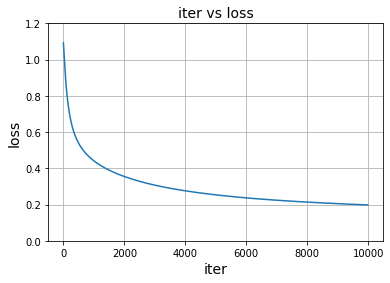

In [24]:
# 学習曲線の表示 (損失関数)
plt.plot(history[:,0], history[:,1])
plt.grid()
plt.ylim(0,1.2)   # y軸の表示範囲を指定
plt.xlabel('iter', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.title('iter vs loss', fontsize=14)
plt.show()

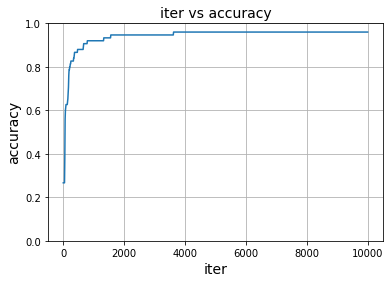

In [25]:
# 学習曲線の表示 (精度)
plt.plot(history[:,0], history[:,2])
plt.ylim(0,1)
plt.grid()
plt.xlabel('iter', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.title('iter vs accuracy', fontsize=14)
plt.show()

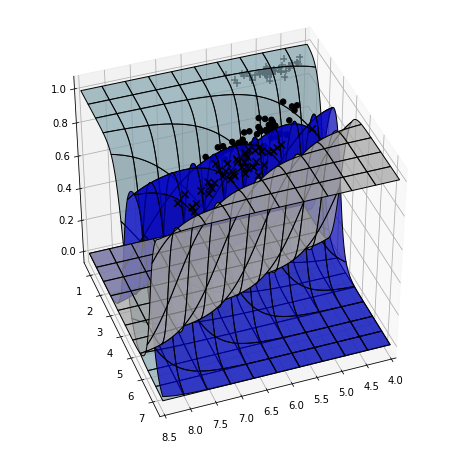

In [26]:
# 3次元表示
from mpl_toolkits.mplot3d import Axes3D
x1 = np.linspace(4, 8.5, 100)
x2 = np.linspace(0.5, 7.5, 100)
xx1, xx2 = np.meshgrid(x1, x2)
xxx = np.array([np.ones(xx1.ravel().shape), 
    xx1.ravel(), xx2.ravel()]).T
pp = pred(xxx, W)
c0 = pp[:,0].reshape(xx1.shape)
c1 = pp[:,1].reshape(xx1.shape)
c2 = pp[:,2].reshape(xx1.shape)
plt.figure(figsize=(8,8))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot_surface(xx1, xx2, c0, color='lightblue', 
    edgecolor='black', rstride=10, cstride=10, alpha=0.7)
ax.plot_surface(xx1, xx2, c1, color='blue', 
    edgecolor='black', rstride=10, cstride=10, alpha=0.7)
ax.plot_surface(xx1, xx2, c2, color='lightgrey', 
    edgecolor='black', rstride=10, cstride=10, alpha=0.7)
ax.scatter(x_t0[:,0], x_t0[:,1], 1, s=50, alpha=1, marker='+', c='k')
ax.scatter(x_t1[:,0], x_t1[:,1], 1, s=30, alpha=1, marker='o', c='k')
ax.scatter(x_t2[:,0], x_t2[:,1], 1, s=50, alpha=1, marker='x', c='k')
ax.set_xlim(4,8.5)
ax.set_ylim(0.5,7.5)
ax.view_init(elev=40, azim=70)

In [27]:
# 評価
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# テストデータで予測値の計算
yp_test_one = pred(x_test, W)
yp_test = np.argmax(yp_test_one, axis=1)

#  精度の計算
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, yp_test)
print('accuracy: %f' % score)

# 混同行列の表示
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, yp_test))
print(classification_report(y_test, yp_test))

accuracy: 0.960000
[[27  0  0]
 [ 0 20  0]
 [ 0  3 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.87      1.00      0.93        20
           2       1.00      0.89      0.94        28

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.97      0.96      0.96        75



# 入力変数を4次元に変更

In [28]:
# ダミー変数を追加
x_all2 = np.insert(x_org, 0, 1.0, axis=1)

In [29]:
# 学習データ、検証データに分割
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train, y_test,\
y_train_one, y_test_one = train_test_split(
    x_all2, y_org, y_all_one, train_size=75, 
    test_size=75, random_state=123)
print(x_train2.shape, x_test2.shape, 
    y_train.shape, y_test.shape, 
    y_train_one.shape, y_test_one.shape)

(75, 5) (75, 5) (75,) (75,) (75, 3) (75, 3)


In [30]:
print('入力データ(x)')
print(x_train2[:5,:])

入力データ(x)
[[1.  6.3 3.3 4.7 1.6]
 [1.  7.  3.2 4.7 1.4]
 [1.  5.  3.  1.6 0.2]
 [1.  6.4 2.8 5.6 2.1]
 [1.  6.3 2.5 5.  1.9]]


In [31]:
# 学習対象の選択
x, yt, x_test  = x_train2, y_train_one, x_test2

In [32]:
# 初期化処理

# 標本数
M  = x.shape[0]
# 入力次元数(ダミー変数を含む
D = x.shape[1]
# 分類先クラス数
N = yt.shape[1]

# 繰り返し回数
iters = 10000

# 学習率
alpha = 0.01

# 重み行列の初期設定(すべて1)
W = np.ones((D, N)) 

# 評価結果記録用
history = np.zeros((0, 3))

In [33]:
#  メイン処理(４次元版)
for k in range(iters):
    
    # 予測値の計算 (9.7.1)　(9.7.2)
    yp = pred(x, W)
    
    # 誤差の計算 (9.7.4)
    yd = yp - yt

    # 重みの更新 (9.7.5)
    W = W - alpha * (x.T @ yd) / M

    if (k % 10 == 0):
        loss, score = evaluate(x_test, y_test, y_test_one, W)
        history = np.vstack((history, np.array([k, loss, score])))
        print("epoch = %d loss = %f score = %f" % (k, loss, score))

epoch = 0 loss = 1.091583 score = 0.266667
epoch = 10 loss = 1.041711 score = 0.266667
epoch = 20 loss = 0.988501 score = 0.266667
epoch = 30 loss = 0.939962 score = 0.573333
epoch = 40 loss = 0.897037 score = 0.626667
epoch = 50 loss = 0.859177 score = 0.626667
epoch = 60 loss = 0.825724 score = 0.626667
epoch = 70 loss = 0.796070 score = 0.626667
epoch = 80 loss = 0.769683 score = 0.653333
epoch = 90 loss = 0.746103 score = 0.653333
epoch = 100 loss = 0.724936 score = 0.693333
epoch = 110 loss = 0.705850 score = 0.746667
epoch = 120 loss = 0.688561 score = 0.760000
epoch = 130 loss = 0.672832 score = 0.760000
epoch = 140 loss = 0.658461 score = 0.786667
epoch = 150 loss = 0.645275 score = 0.786667
epoch = 160 loss = 0.633131 score = 0.786667
epoch = 170 loss = 0.621903 score = 0.813333
epoch = 180 loss = 0.611485 score = 0.813333
epoch = 190 loss = 0.601788 score = 0.840000
epoch = 200 loss = 0.592731 score = 0.840000
epoch = 210 loss = 0.584248 score = 0.880000
epoch = 220 loss = 0.

epoch = 2010 loss = 0.271927 score = 0.960000
epoch = 2020 loss = 0.271335 score = 0.960000
epoch = 2030 loss = 0.270748 score = 0.960000
epoch = 2040 loss = 0.270164 score = 0.960000
epoch = 2050 loss = 0.269584 score = 0.960000
epoch = 2060 loss = 0.269007 score = 0.960000
epoch = 2070 loss = 0.268434 score = 0.960000
epoch = 2080 loss = 0.267865 score = 0.960000
epoch = 2090 loss = 0.267299 score = 0.960000
epoch = 2100 loss = 0.266736 score = 0.960000
epoch = 2110 loss = 0.266177 score = 0.960000
epoch = 2120 loss = 0.265621 score = 0.960000
epoch = 2130 loss = 0.265069 score = 0.960000
epoch = 2140 loss = 0.264520 score = 0.960000
epoch = 2150 loss = 0.263974 score = 0.960000
epoch = 2160 loss = 0.263431 score = 0.960000
epoch = 2170 loss = 0.262892 score = 0.960000
epoch = 2180 loss = 0.262356 score = 0.960000
epoch = 2190 loss = 0.261823 score = 0.960000
epoch = 2200 loss = 0.261293 score = 0.960000
epoch = 2210 loss = 0.260767 score = 0.960000
epoch = 2220 loss = 0.260243 score

epoch = 3820 loss = 0.203490 score = 0.960000
epoch = 3830 loss = 0.203249 score = 0.960000
epoch = 3840 loss = 0.203010 score = 0.960000
epoch = 3850 loss = 0.202772 score = 0.960000
epoch = 3860 loss = 0.202534 score = 0.960000
epoch = 3870 loss = 0.202298 score = 0.960000
epoch = 3880 loss = 0.202062 score = 0.960000
epoch = 3890 loss = 0.201827 score = 0.960000
epoch = 3900 loss = 0.201594 score = 0.960000
epoch = 3910 loss = 0.201361 score = 0.960000
epoch = 3920 loss = 0.201129 score = 0.960000
epoch = 3930 loss = 0.200898 score = 0.960000
epoch = 3940 loss = 0.200668 score = 0.960000
epoch = 3950 loss = 0.200439 score = 0.960000
epoch = 3960 loss = 0.200211 score = 0.960000
epoch = 3970 loss = 0.199983 score = 0.960000
epoch = 3980 loss = 0.199757 score = 0.960000
epoch = 3990 loss = 0.199531 score = 0.960000
epoch = 4000 loss = 0.199306 score = 0.960000
epoch = 4010 loss = 0.199083 score = 0.960000
epoch = 4020 loss = 0.198860 score = 0.960000
epoch = 4030 loss = 0.198638 score

epoch = 5840 loss = 0.168905 score = 0.960000
epoch = 5850 loss = 0.168784 score = 0.960000
epoch = 5860 loss = 0.168663 score = 0.960000
epoch = 5870 loss = 0.168542 score = 0.960000
epoch = 5880 loss = 0.168421 score = 0.960000
epoch = 5890 loss = 0.168301 score = 0.960000
epoch = 5900 loss = 0.168181 score = 0.960000
epoch = 5910 loss = 0.168062 score = 0.960000
epoch = 5920 loss = 0.167943 score = 0.960000
epoch = 5930 loss = 0.167824 score = 0.960000
epoch = 5940 loss = 0.167705 score = 0.960000
epoch = 5950 loss = 0.167587 score = 0.960000
epoch = 5960 loss = 0.167470 score = 0.960000
epoch = 5970 loss = 0.167352 score = 0.960000
epoch = 5980 loss = 0.167235 score = 0.960000
epoch = 5990 loss = 0.167118 score = 0.960000
epoch = 6000 loss = 0.167002 score = 0.960000
epoch = 6010 loss = 0.166886 score = 0.960000
epoch = 6020 loss = 0.166770 score = 0.960000
epoch = 6030 loss = 0.166654 score = 0.960000
epoch = 6040 loss = 0.166539 score = 0.960000
epoch = 6050 loss = 0.166424 score

epoch = 7810 loss = 0.150207 score = 0.960000
epoch = 7820 loss = 0.150133 score = 0.960000
epoch = 7830 loss = 0.150059 score = 0.960000
epoch = 7840 loss = 0.149986 score = 0.960000
epoch = 7850 loss = 0.149912 score = 0.960000
epoch = 7860 loss = 0.149839 score = 0.960000
epoch = 7870 loss = 0.149766 score = 0.960000
epoch = 7880 loss = 0.149693 score = 0.960000
epoch = 7890 loss = 0.149620 score = 0.960000
epoch = 7900 loss = 0.149548 score = 0.960000
epoch = 7910 loss = 0.149475 score = 0.960000
epoch = 7920 loss = 0.149403 score = 0.960000
epoch = 7930 loss = 0.149331 score = 0.960000
epoch = 7940 loss = 0.149259 score = 0.960000
epoch = 7950 loss = 0.149187 score = 0.960000
epoch = 7960 loss = 0.149115 score = 0.960000
epoch = 7970 loss = 0.149044 score = 0.960000
epoch = 7980 loss = 0.148972 score = 0.960000
epoch = 7990 loss = 0.148901 score = 0.960000
epoch = 8000 loss = 0.148830 score = 0.960000
epoch = 8010 loss = 0.148759 score = 0.960000
epoch = 8020 loss = 0.148688 score

epoch = 9650 loss = 0.138912 score = 0.960000
epoch = 9660 loss = 0.138861 score = 0.960000
epoch = 9670 loss = 0.138811 score = 0.960000
epoch = 9680 loss = 0.138760 score = 0.960000
epoch = 9690 loss = 0.138709 score = 0.960000
epoch = 9700 loss = 0.138659 score = 0.960000
epoch = 9710 loss = 0.138609 score = 0.960000
epoch = 9720 loss = 0.138558 score = 0.960000
epoch = 9730 loss = 0.138508 score = 0.960000
epoch = 9740 loss = 0.138458 score = 0.960000
epoch = 9750 loss = 0.138408 score = 0.960000
epoch = 9760 loss = 0.138358 score = 0.960000
epoch = 9770 loss = 0.138308 score = 0.960000
epoch = 9780 loss = 0.138258 score = 0.960000
epoch = 9790 loss = 0.138209 score = 0.960000
epoch = 9800 loss = 0.138159 score = 0.960000
epoch = 9810 loss = 0.138110 score = 0.960000
epoch = 9820 loss = 0.138060 score = 0.960000
epoch = 9830 loss = 0.138011 score = 0.960000
epoch = 9840 loss = 0.137962 score = 0.960000
epoch = 9850 loss = 0.137913 score = 0.960000
epoch = 9860 loss = 0.137864 score

In [34]:
print(history.shape)

(1000, 3)


In [35]:
#損失関数値と精度の確認
print('初期状態: 損失関数:%f 精度:%f' 
    % (history[0,1], history[0,2]))
print('最終状態: 損失関数:%f 精度:%f' 
    % (history[-1,1], history[-1,2]))

初期状態: 損失関数:1.091583 精度:0.266667
最終状態: 損失関数:0.137235 精度:0.960000


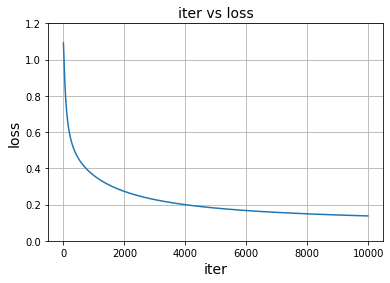

In [36]:
# 学習曲線の表示 (損失関数)
plt.plot(history[:,0], history[:,1])
plt.ylim(0,1.2)
plt.grid()
plt.xlabel('iter', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.title('iter vs loss', fontsize=14)
plt.show()

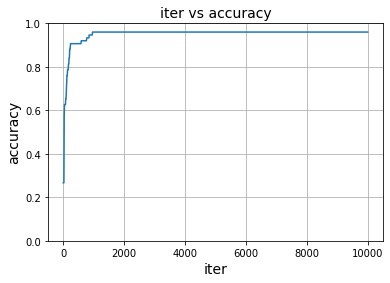

In [37]:
# 学習曲線の表示 (精度)
plt.plot(history[:,0], history[:,2])
plt.ylim(0,1)
plt.grid()
plt.xlabel('iter', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.title('iter vs accuracy', fontsize=14)
plt.show()